In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npy

df = pd.read_csv('../Projektdatensaetze/2023/Fahrradzaehlstellen2023_stuendlich_RENAMED.csv',
                 sep=';')

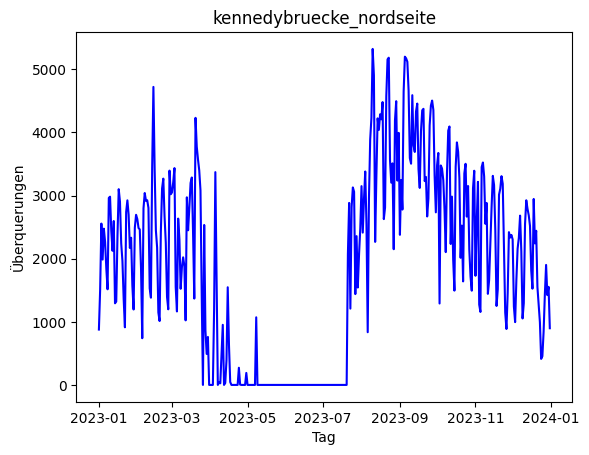

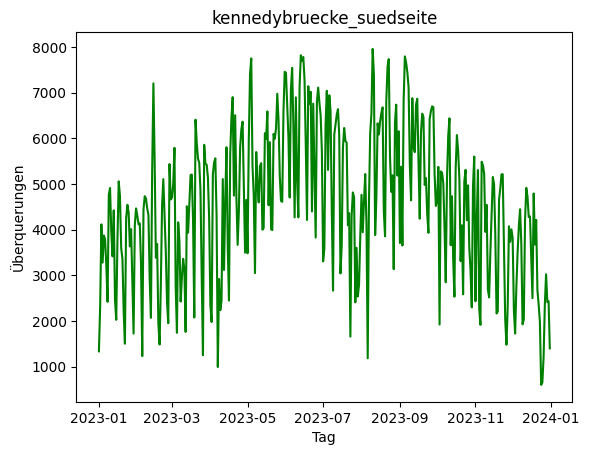

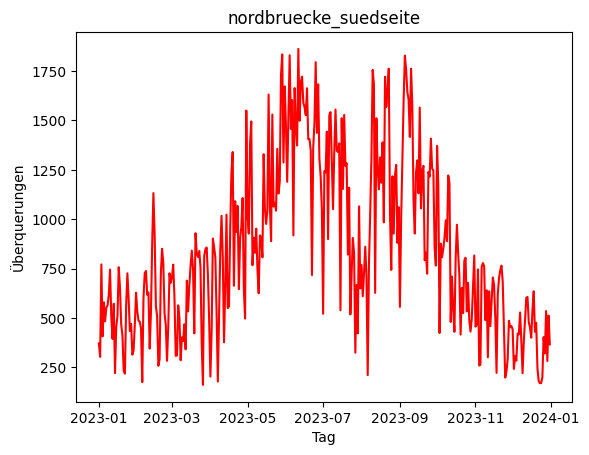

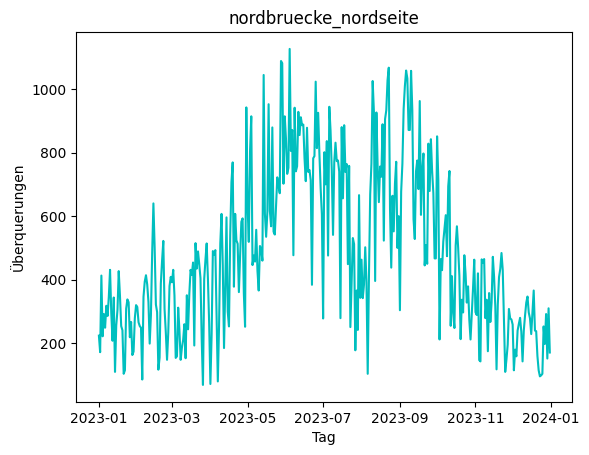

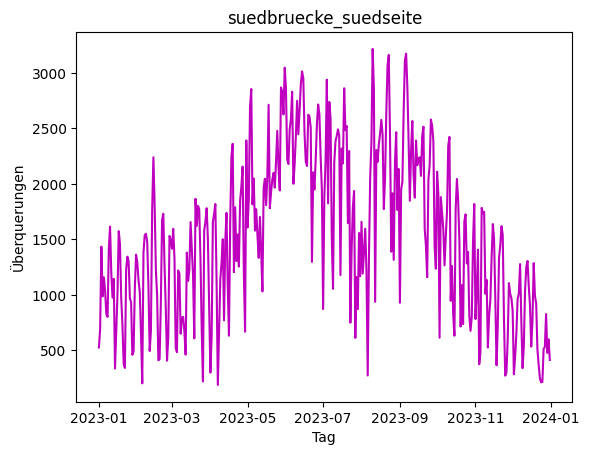

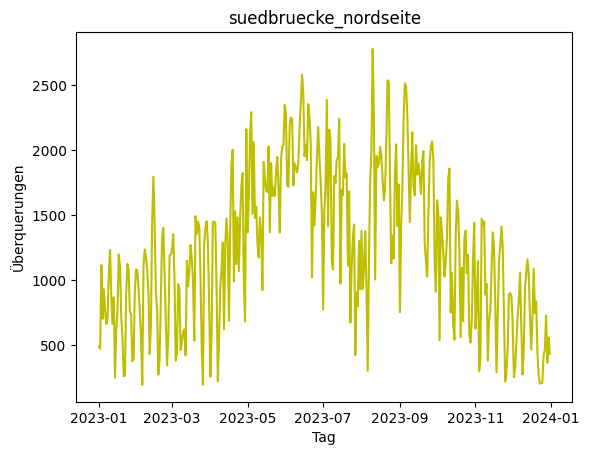

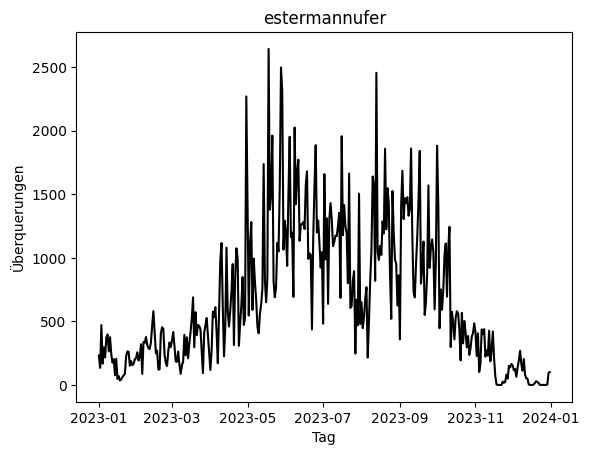

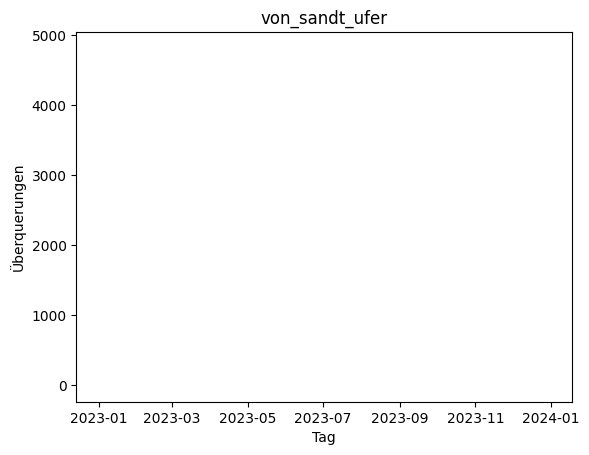

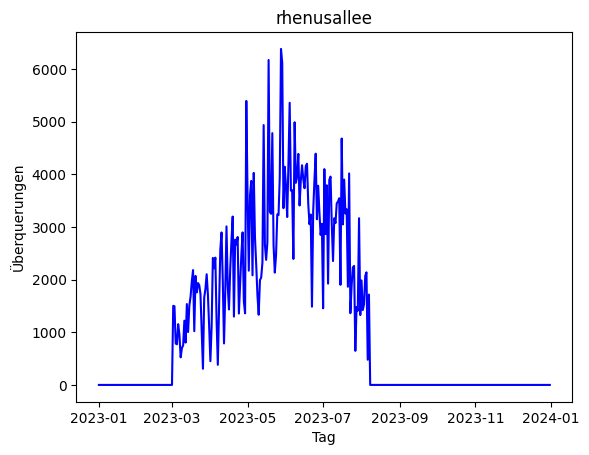

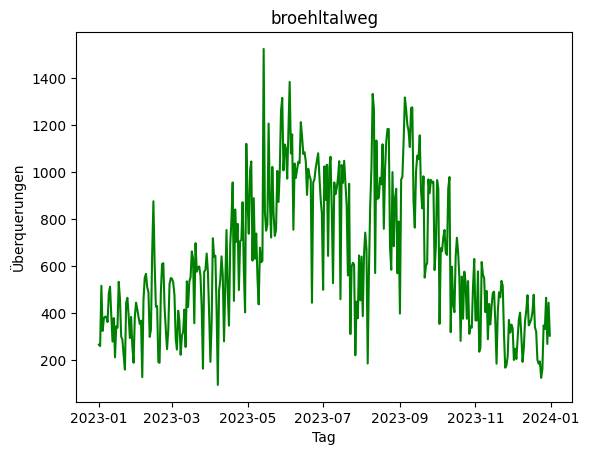

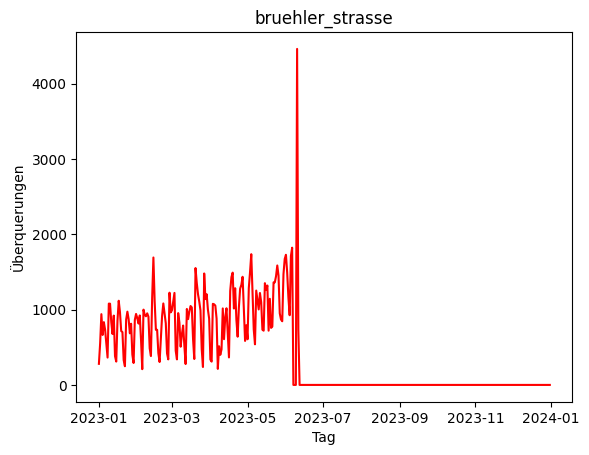

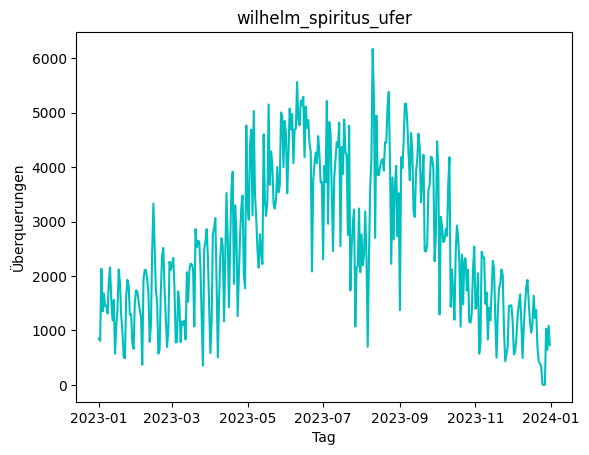

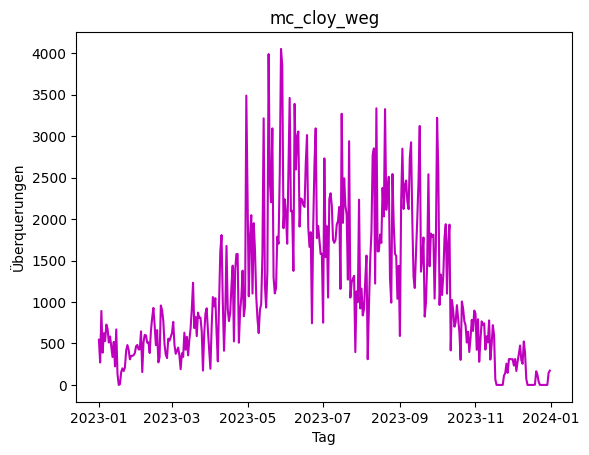

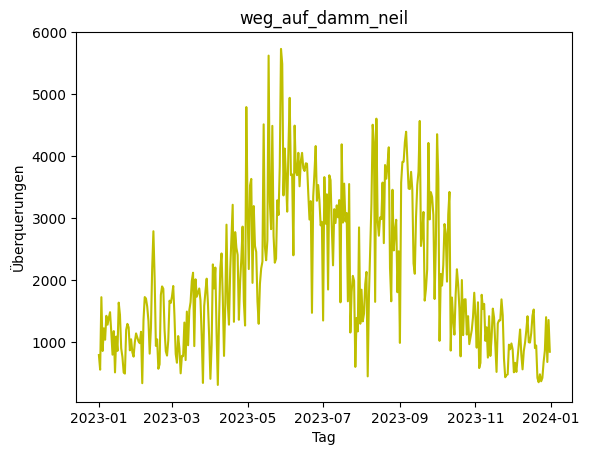

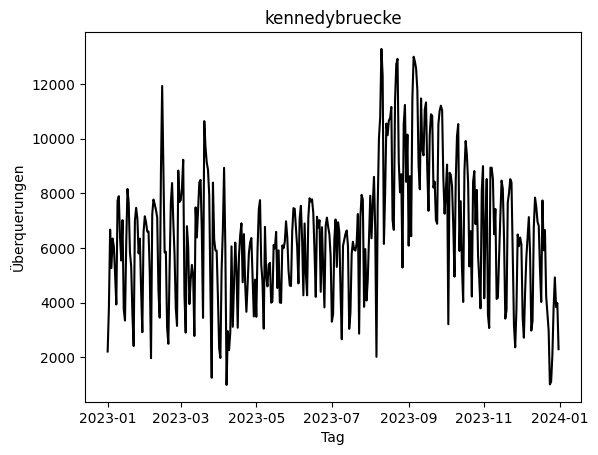

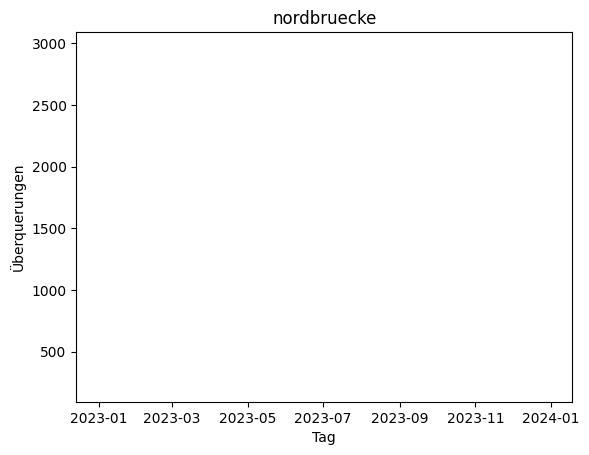

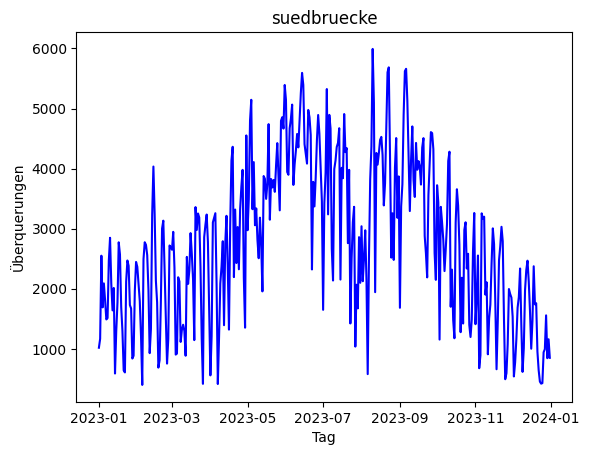

<Figure size 640x480 with 0 Axes>

In [173]:
#fasse jeden Tag zusammen
df['time'] = pd.to_datetime(df['time'], format='%d.%m.%Y %H:%M')
df['days'] = df['time'].dt.date
column_names = list(df.columns)
colors = ['b','g','r', 'c', 'm','y','k', 'w', 'b',
'g','r', 'c', 'm','y','k', 'w','b','g','r', 'c', 'm','y','k', 'w', 'b',
'g','r', 'c', 'm','y','k', 'w']
#bestimme, wie viele Überquerungen am Tag
all_dates = pd.date_range(start=df['days'].min(), end=df['days'].max())
i = 0;
for header in column_names:
    if header != 'time' and header != 'days':
        x_values_per_day = df.groupby('days')[header].sum()
        x_values_per_day = x_values_per_day.reindex(all_dates, fill_value=None)
        plt.plot(x_values_per_day, colors[i])
        plt.title(header)
        plt.xlabel('Tag')
        plt.ylabel('Überquerungen')
        plt.show()
        plt.figure()

        i += 1


In [157]:
#finde alle Tage mit 0 Überquerungen
zero_crossings = x_values_per_day[x_values_per_day == 0]
zero_crossings

2023-03-26    0.0
2023-03-31    0.0
2023-04-01    0.0
2023-04-02    0.0
2023-04-03    0.0
2023-04-07    0.0
2023-04-12    0.0
2023-04-18    0.0
2023-04-19    0.0
2023-04-20    0.0
2023-04-21    0.0
2023-04-22    0.0
2023-04-23    0.0
2023-04-26    0.0
2023-04-27    0.0
2023-04-28    0.0
2023-04-29    0.0
2023-05-01    0.0
2023-05-02    0.0
2023-05-03    0.0
2023-05-04    0.0
2023-05-05    0.0
2023-05-06    0.0
2023-05-07    0.0
2023-05-09    0.0
2023-05-10    0.0
2023-05-11    0.0
2023-05-12    0.0
2023-05-13    0.0
2023-05-14    0.0
2023-05-15    0.0
2023-05-16    0.0
2023-05-17    0.0
2023-05-18    0.0
2023-05-19    0.0
2023-05-20    0.0
2023-05-21    0.0
2023-05-22    0.0
2023-05-23    0.0
2023-05-24    0.0
2023-05-25    0.0
2023-05-26    0.0
2023-05-27    0.0
2023-05-28    0.0
2023-05-29    0.0
2023-05-30    0.0
2023-05-31    0.0
2023-06-01    0.0
2023-06-02    0.0
2023-06-03    0.0
2023-06-04    0.0
2023-06-05    0.0
2023-06-06    0.0
2023-06-07    0.0
2023-06-08    0.0
2023-06-09

In [158]:
#finde alle Tage, wo keine Werte angeben sind
#FEHELRHAFT, denn es gibt Tage mit null-Werten
null_values = x_values_per_day[x_values_per_day.isna()]
null_values

Series([], Freq: D, Name: kennedybruecke_nordseite, dtype: float64)